# Iris - Applying and Evaluating Supervised Learning Models

In [46]:
!uv add numpy scipy matplotlib seaborn pandas scikit-learn

Resolved 57 packages in 14ms
Audited 53 packages in 13ms


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="white", palette="pastel")

## Load Iris dataset

In [48]:
data = load_iris(as_frame=True)
data

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [49]:
df: pd.DataFrame = data["frame"]
df = df.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
})
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
target_names = data["target_names"].tolist()
target_names

['setosa', 'versicolor', 'virginica']

## Observe the data distribution

In [51]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


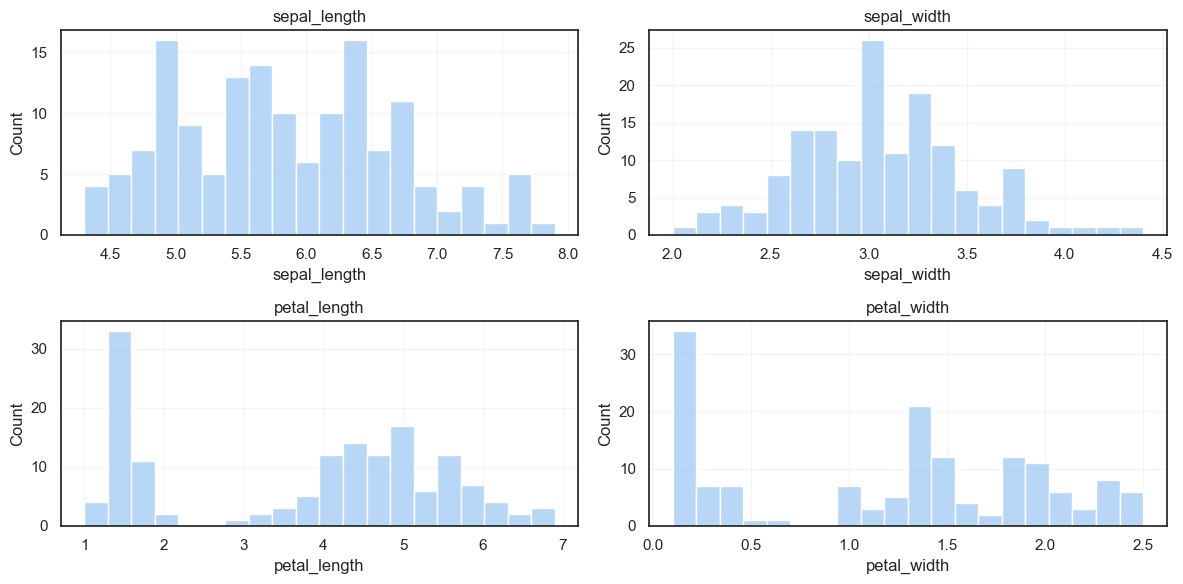

In [52]:
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.ravel()

for ax, c in zip(axes, cols):
    sns.histplot(data=df, x=df[c], bins=20, ax=ax)
    ax.set_title(c)
    ax.grid(True, alpha=0.2)

for ax in axes[len(cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [53]:
# Since none of the features are close to a normal distribution, min–max normalization is used.
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [54]:
# Split the dataset into training dataset (80%) and evaluation dataset (20%)
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["target"])

In [55]:
train_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,120.000000,120.000000,120.000000,120.000000,120.00000
mean,0.428241,0.436806,0.469492,0.460417,1.00000
std,0.233591,0.186885,0.299749,0.317776,0.81992
min,0.000000,0.000000,0.016949,0.000000,0.00000
25%,0.222222,0.333333,0.101695,0.083333,0.00000
50%,0.402778,0.416667,0.550847,0.500000,1.00000
75%,0.583333,0.552083,0.694915,0.708333,2.00000
max,1.000000,1.000000,1.000000,1.000000,2.00000


In [56]:
eval_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.430556,0.455556,0.459322,0.448611,1.000000
std,0.218935,0.160792,0.301963,0.322133,0.830455
min,0.027778,0.125000,0.000000,0.041667,0.000000
25%,0.263889,0.385417,0.093220,0.041667,0.000000
50%,0.486111,0.416667,0.593220,0.541667,1.000000
75%,0.611111,0.541667,0.690678,0.708333,2.000000
max,0.833333,0.833333,0.898305,0.958333,2.000000


In [57]:
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
train_X, train_y = train_df[cols], train_df["target"]
eval_X, eval_y = eval_df[cols], eval_df["target"]

## Tree-Based Models

In [58]:
# Decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(train_X, train_y)
pred_y = model.predict(eval_X)
dt_metrics = {
    "model": "decision_tree",
    "accuracy": accuracy_score(eval_y, pred_y),
    "precision": precision_score(eval_y, pred_y, average="macro"),
    "recall": recall_score(eval_y, pred_y, average="macro"),
    "f1": f1_score(eval_y, pred_y, average="macro"),
}
dt_metrics

{'model': 'decision_tree',
 'accuracy': 0.9333333333333333,
 'precision': 0.9333333333333332,
 'recall': 0.9333333333333332,
 'f1': 0.9333333333333332}

In [59]:
# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(train_X, train_y)
pred_y = model.predict(eval_X)
rf_metrics = {
    "model": "random_forest",
    "accuracy": accuracy_score(eval_y, pred_y),
    "precision": precision_score(eval_y, pred_y, average="macro"),
    "recall": recall_score(eval_y, pred_y, average="macro"),
    "f1": f1_score(eval_y, pred_y, average="macro"),
}
rf_metrics

{'model': 'random_forest',
 'accuracy': 0.9,
 'precision': 0.9023569023569024,
 'recall': 0.9,
 'f1': 0.899749373433584}

In [60]:
# Gradient Boosted Trees
model = GradientBoostingClassifier(random_state=42)
model.fit(train_X, train_y)
pred_y = model.predict(eval_X)
gbt_metrics = {
    "model": "gradient_boosted_trees",
    "accuracy": accuracy_score(eval_y, pred_y),
    "precision": precision_score(eval_y, pred_y, average="macro"),
    "recall": recall_score(eval_y, pred_y, average="macro"),
    "f1": f1_score(eval_y, pred_y, average="macro"),
}
gbt_metrics

{'model': 'gradient_boosted_trees',
 'accuracy': 0.9666666666666667,
 'precision': 0.9696969696969697,
 'recall': 0.9666666666666667,
 'f1': 0.9665831244778612}

## K-Nearest Neighbors (KNN) Model

In [61]:
k_values = range(1, 21)

acc_list = []
prec_list = []
rec_list = []
f1_list = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    pred = model.predict(eval_X)

    acc_list.append(accuracy_score(eval_y, pred))
    prec_list.append(precision_score(eval_y, pred, average="macro"))
    rec_list.append(recall_score(eval_y, pred, average="macro"))
    f1_list.append(f1_score(eval_y, pred, average="macro"))

# Choose the best `k`
best_idx = int(np.argmax(f1_list))
best_k = list(k_values)[best_idx]

print(f"Best k (by macro-F1 on eval): {best_k}")
print(f"Best macro-F1: {f1_list[best_idx]:.4f}")

Best k (by macro-F1 on eval): 7
Best macro-F1: 1.0000


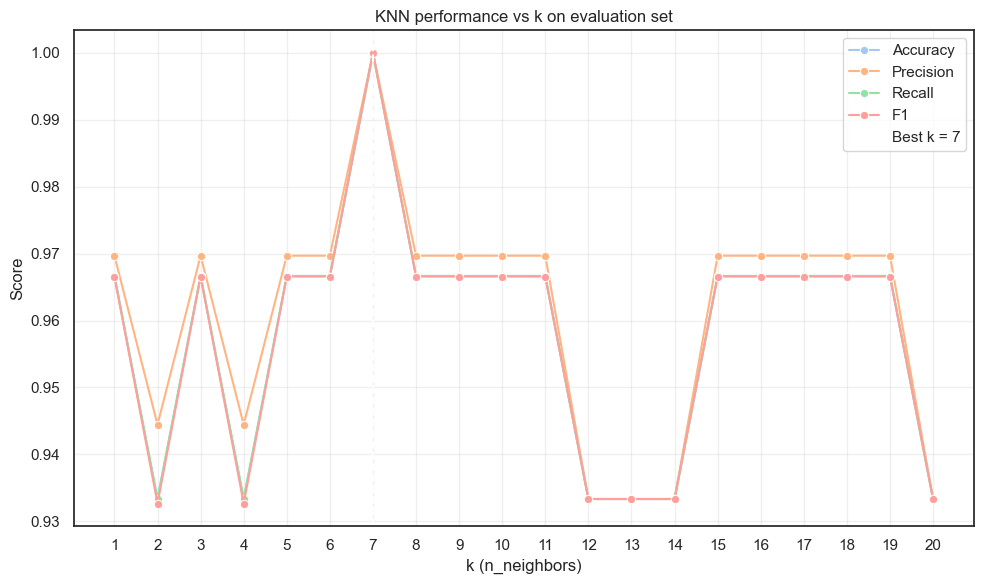

In [65]:
plot_df = pd.DataFrame({
    "k": list(k_values),
    "Accuracy": acc_list,
    "Precision": prec_list,
    "Recall": rec_list,
    "F1": f1_list
})

plot_df = plot_df.melt(
    id_vars="k",
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=plot_df,
    x="k",
    y="Score",
    hue="Metric",
    marker="o",
    estimator=None,
    ci=None
)

plt.axvline(best_k, linestyle="--", label=f"Best k = {best_k}")
plt.xticks(k_values)
plt.xlabel("k (n_neighbors)")
plt.ylabel("Score")
plt.title("KNN performance vs k on evaluation set")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [63]:
# The best `k` is 7, the metrics for the best `k` are stored in the 6th slots of metric lists
knn_metrics = {
    "model": "knn (k=7)",
    "accuracy": acc_list[6],
    "precision": prec_list[6],
    "recall": rec_list[6],
    "f1": f1_list[6],
}
knn_metrics

{'model': 'knn (k=7)',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0}

## Conclusion

In [64]:
result_df = pd.DataFrame([dt_metrics, rf_metrics, gbt_metrics, knn_metrics])
result_df

,model,accuracy,precision,recall,f1
0,decision_tree,0.933333,0.933333,0.933333,0.933333
1,random_forest,0.900000,0.902357,0.900000,0.899749
2,gradient_boosted_trees,0.966667,0.969697,0.966667,0.966583
3,knn (k=7),1.000000,1.000000,1.000000,1.000000


- **KNN (k=7)** achieves perfect performance across all metrics, indicating that the Iris dataset is highly separable in feature space and well suited for distance-based methods.
- **Gradient Boosted Trees** deliver the strongest performance among the tree-based models, reflecting their ability to combine multiple weak learners into a more accurate and robust classifier.
- **Decision Tree** shows solid but slightly lower performance, suggesting mild overfitting or sensitivity to the training data compared with ensemble methods.
- **Random Forest** performs consistently but does not surpass Gradient Boosting, likely due to the small dataset size where its variance-reduction advantage is less pronounced.
- Overall, the results confirm that **simple models can perform extremely well on small, clean datasets**, and performance differences mainly reflect each model’s bias–variance characteristics.